In [1]:
import pandas as pd
import numpy as np

In [2]:
decks_df = pd.read_csv("https://raw.githubusercontent.com/amcclead7336/MTG_GameData/main/Decks.csv")
gd_df = pd.read_csv("https://raw.githubusercontent.com/amcclead7336/MTG_GameData/main/GameData.csv")

display(decks_df.head())
gd_df.head()

,ID,Deck Title,Commander,Ratings 2022-11-20,White,Blue,Black,Red,Green,Notes
0,0,Painbow,Jared Carthalion,4.0,1,1,1,1,1,NaN
1,1,Legends' Legacy,"Dihada, Binder of Wills",5.0,1,0,1,1,0,NaN
2,2,Planar Portal,"Prosper, Tome-Bound",3.0,0,0,1,1,0,NaN
3,3,Aura of Courage,"Galea, Kindler of Hope",4.0,1,1,0,0,1,NaN
4,4,Dungeons of Death,Sefris of the Hidden Ways,2.0,1,1,1,0,0,NaN


,Date,P0Deck,P1Deck,P0EndLife,P1EndLife,P0Time,P1Time,TotalTime,P0TotalCards,P1TotalCards,P0Win,P1Win,P0,P1
0,2022-11-23,13,14,-4,39,0:09:29,0:14:42,0:24:11,11,14,0,1,0,1
1,2022-11-23,13,15,-1,12,0:20:11,0:23:00,0:43:11,13,25,0,1,0,1
2,2022-11-23,15,13,7,-3,0:18:17,0:37:51,0:56:08,22,33,1,0,0,1
3,2022-12-26,6,3,-3,28,0:06:14,0:11:36,0:17:50,11,17,0,1,0,1
4,2022-12-26,6,16,-4,36,0:05:33,0:10:54,0:16:27,8,10,0,1,0,1


In [3]:
gd_w_deck = gd_df.merge(decks_df, left_on="P0Deck", right_on="ID")
gd_w_deck = gd_w_deck.merge(decks_df,left_on="P1Deck", right_on="ID")

p0Decks = gd_w_deck['Deck Title_x'].value_counts()
p1Decks = gd_w_deck['Deck Title_y'].value_counts()
for pdeck in [p0Decks, p1Decks]:
    for deck in decks_df['Deck Title']:
        if deck not in pdeck.index:
            pdeck[deck] = 0

p0Decks = p0Decks.sort_index()
p1Decks = p1Decks.sort_index()

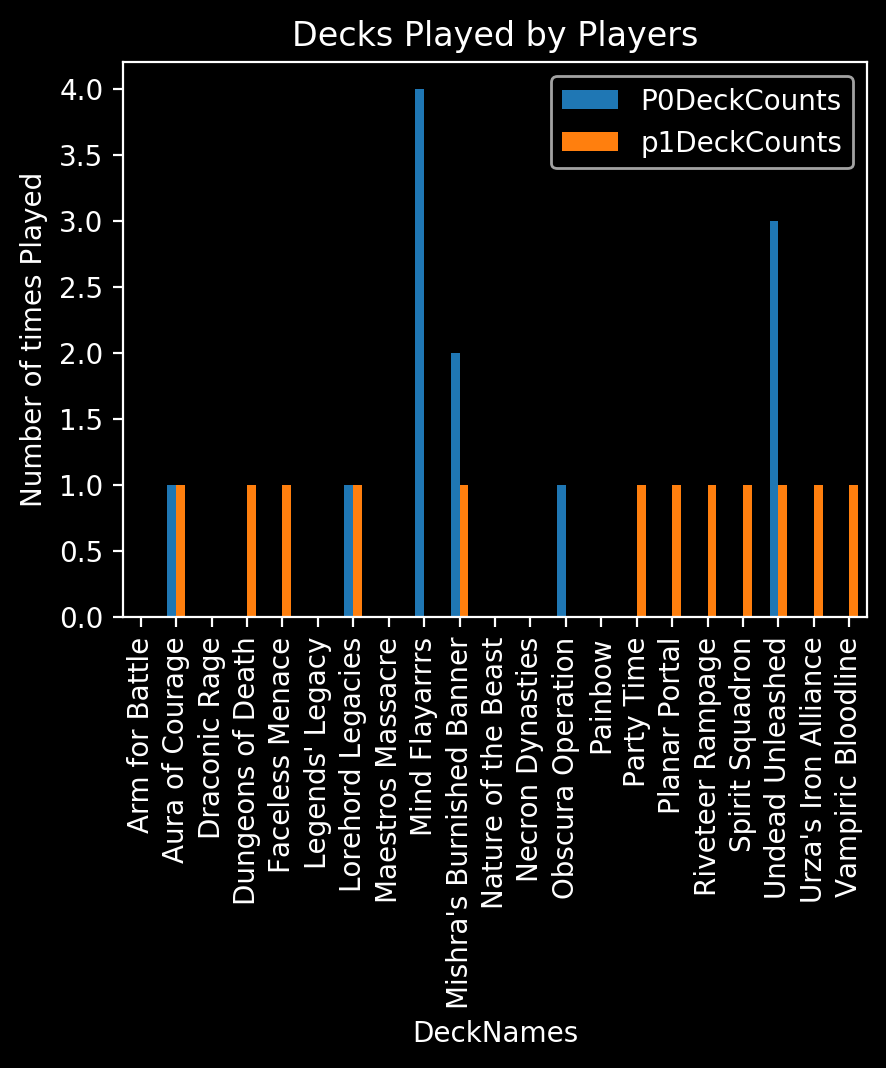

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pdecks = {"DeckNames":p0Decks.index,"P0DeckCounts":p0Decks.values, "p1DeckCounts":p1Decks.values}
pdecks_df = pd.DataFrame(pdecks)

pdecks_df.plot(kind='bar',x='DeckNames')

plt.title("Decks Played by Players")
plt.ylabel("Number of times Played")
plt.xticks(rotation=90)
plt.show()

In [5]:
deck_colors = decks_df.loc[:, "White":"Green"]
deck_colors.head()

,White,Blue,Black,Red,Green
0,1,1,1,1,1
1,1,0,1,1,0
2,0,0,1,1,0
3,1,1,0,0,1
4,1,1,1,0,0


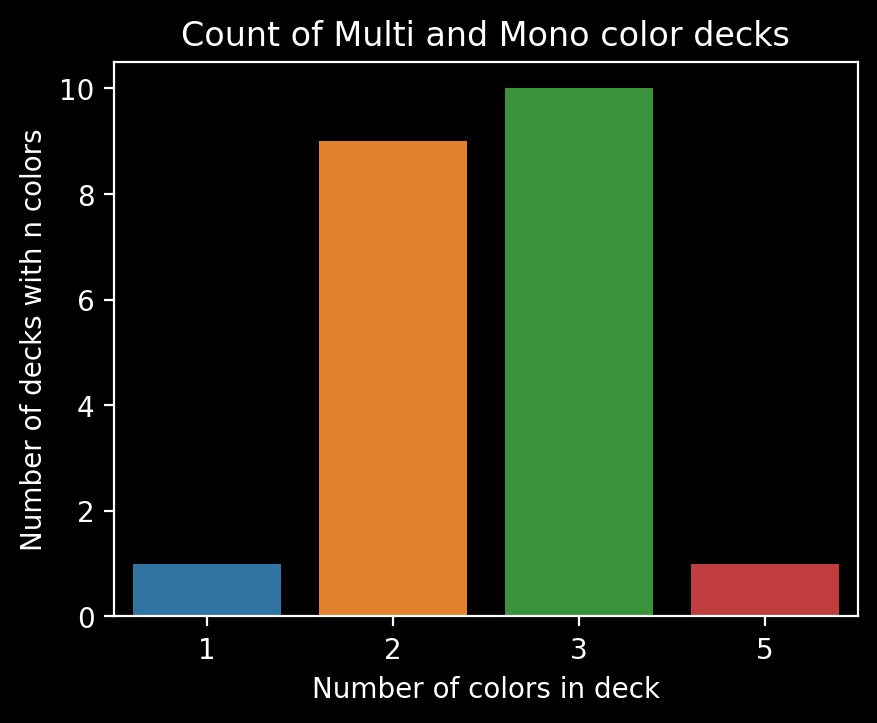

In [6]:
deck_color_counts = deck_colors.sum(axis=1).value_counts().sort_index()
sns.barplot(x = deck_color_counts.index, y=deck_color_counts.values)
plt.title("Count of Multi and Mono color decks")
plt.xlabel("Number of colors in deck")
plt.ylabel("Number of decks with n colors")
plt.show()

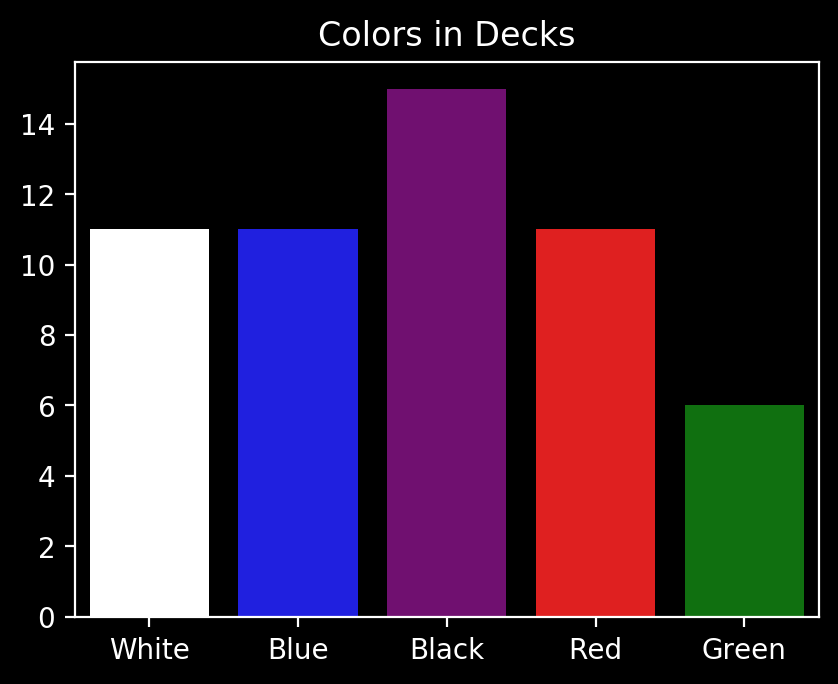

In [7]:
deck_color_counts2 = deck_colors.sum(axis=0)
sns.barplot(x=deck_color_counts2.index, y=deck_color_counts2.values, palette=['White','Blue',"Purple","Red","Green"])
plt.title("Colors in Decks")
plt.show()

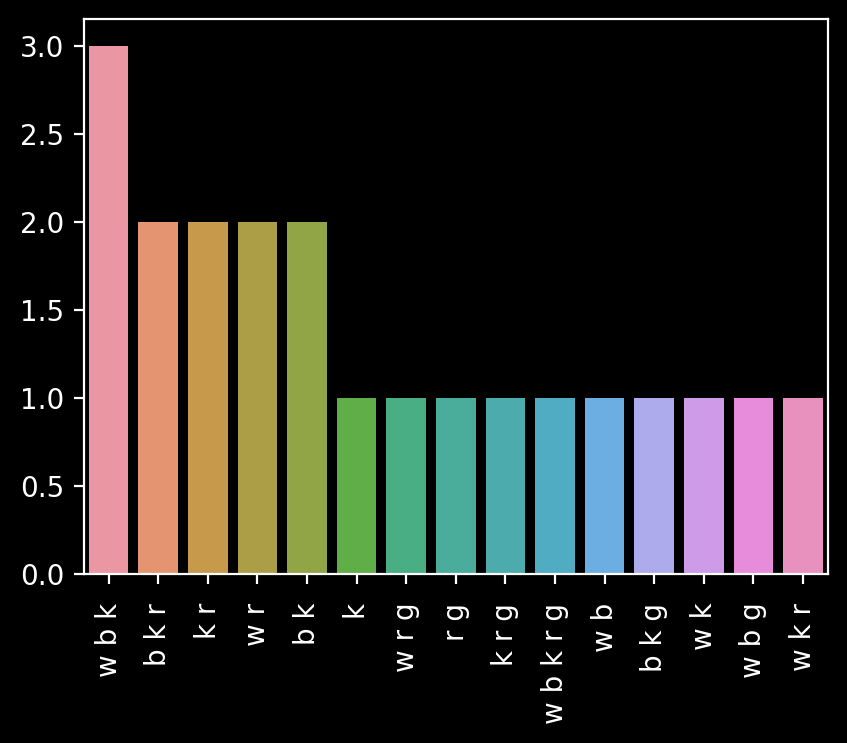

In [8]:
def color_translate(row):
    out_str = ''
    color_codes = 'wbkrg'
    for i, c in enumerate(color_codes):
        if row[i] == 1:
            out_str += c+" "
    return out_str

deck_colors["combined"] = deck_colors.apply(color_translate,axis=1)

comb_color_counts = deck_colors["combined"].value_counts()
sns.barplot(x = comb_color_counts.index, y = comb_color_counts.values)
plt.xticks(rotation=90)
plt.show()